# ハンズオン・コンテンツの準備

OCS ハンズオンコンテンツのディレクトリとファイルを Jupyter Notebook 環境に展開します。

In [ ]:
!git clone https://github.com/nii-gakunin-cloud/handson.git

# VCP SDK のセットアップ

VCP SDK を利用するための初期設定と、アプリケーション・テンプレート等のインストールを行います。

## 設定ファイルの準備

VCP SDK を利用する上で必要となる設定ファイルを作成します。

### `vcp_config.yml` ファイルの編集

以下のセルを実行すると、VCP SDK 設定ファイル `vcp_config.yml` を編集するためのリンクボタンが表示されます。

```
vcc:
    host: VCコントローラのIPアドレス (VCPポータブル版を同一ホストに構築した場合は localhost を指定)
    name: VCコントローラの名前 (VCコントローラ上のログ出力に使用)
```

In [ ]:
import os

config_dir = "{}/vcpsdk/vcpsdk/config".format(os.environ.get("HOME"))
!mkdir -p vcp_config
!cp $config_dir/vcp_flavor.yml vcp_config/
!cp $config_dir/sample-vault-vcp_config.yml vcp_config/vcp_config.yml

curdir = os.getcwd().replace('/notebooks/notebook/', '')
config_url = "/{}/edit/vcp_config/vcp_config.yml".format(os.environ['SUBDIR'])
from IPython.core.display import HTML

style= "text-decoration: none;\
padding: 4px 8px;border: solid 2px #ddf; color: #fff;\
font-size: 20px;\
font-weight: bold;\
background-color: rgb(100, 149, 237);"
HTML('<a style="{}" target="new" href="{}">vcp_config.ymlを編集</a>'.
     format(style, config_url))

## クラウド認証情報の取得・設定

利用先クラウドプロバイダーの認証情報（今回のハンズオンでは、 **さくらのクラウドのAPIキー**）をVCコントローラにある秘密情報管理サーバ (Vaultサーバ) のストレージに書き込む作業を行います。

### さくらのクラウド API キー取得

さくらのクラウドのコントロールパネルからAPIキーの管理画面にアクセスし、作成済みのAPIキー「**OCSハンズオン2022**」を確認します。

<img src=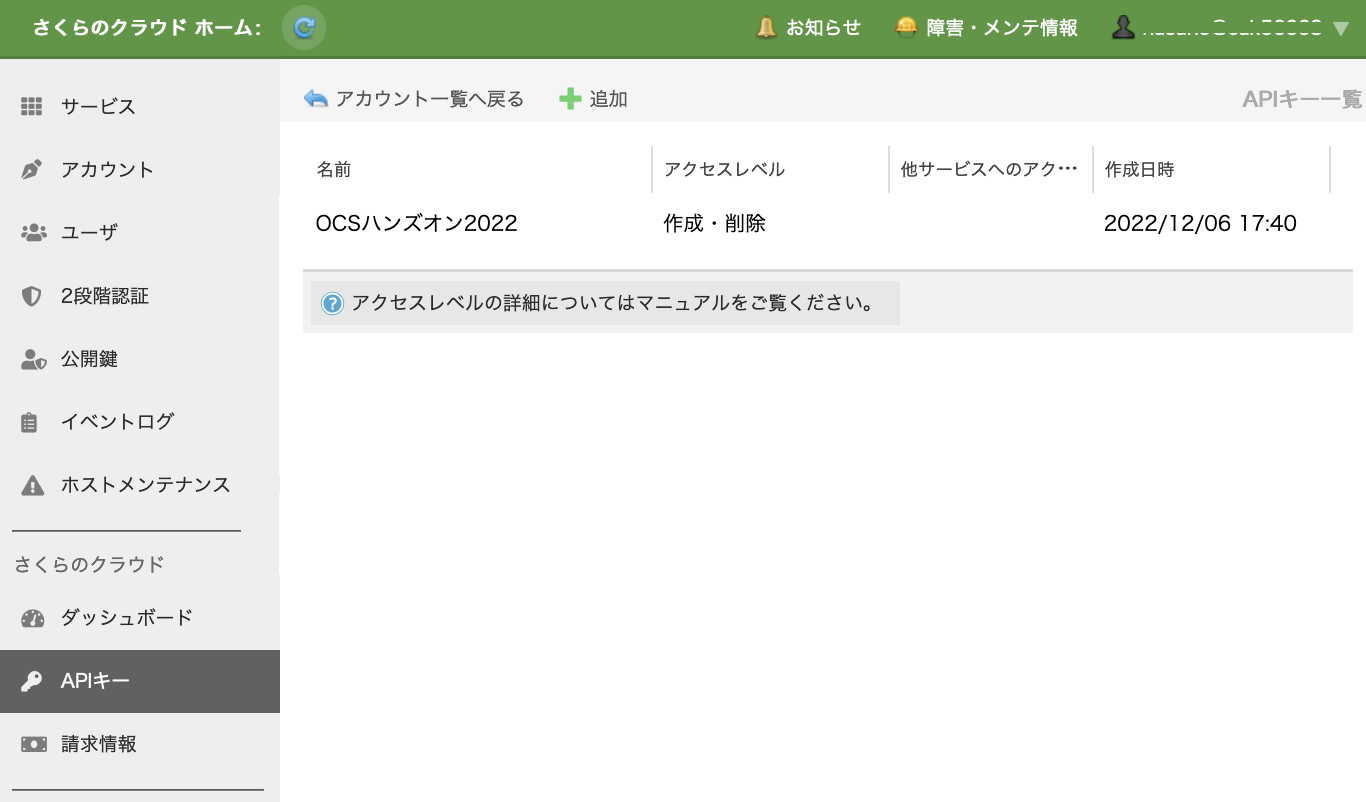>

既存のAPIキー「**OCSハンズオン2022**」を選択し、その詳細画面から次の2つの文字列をそれぞれコピーして控えておきます。

- アクセストークン
- アクセストークンシークレット

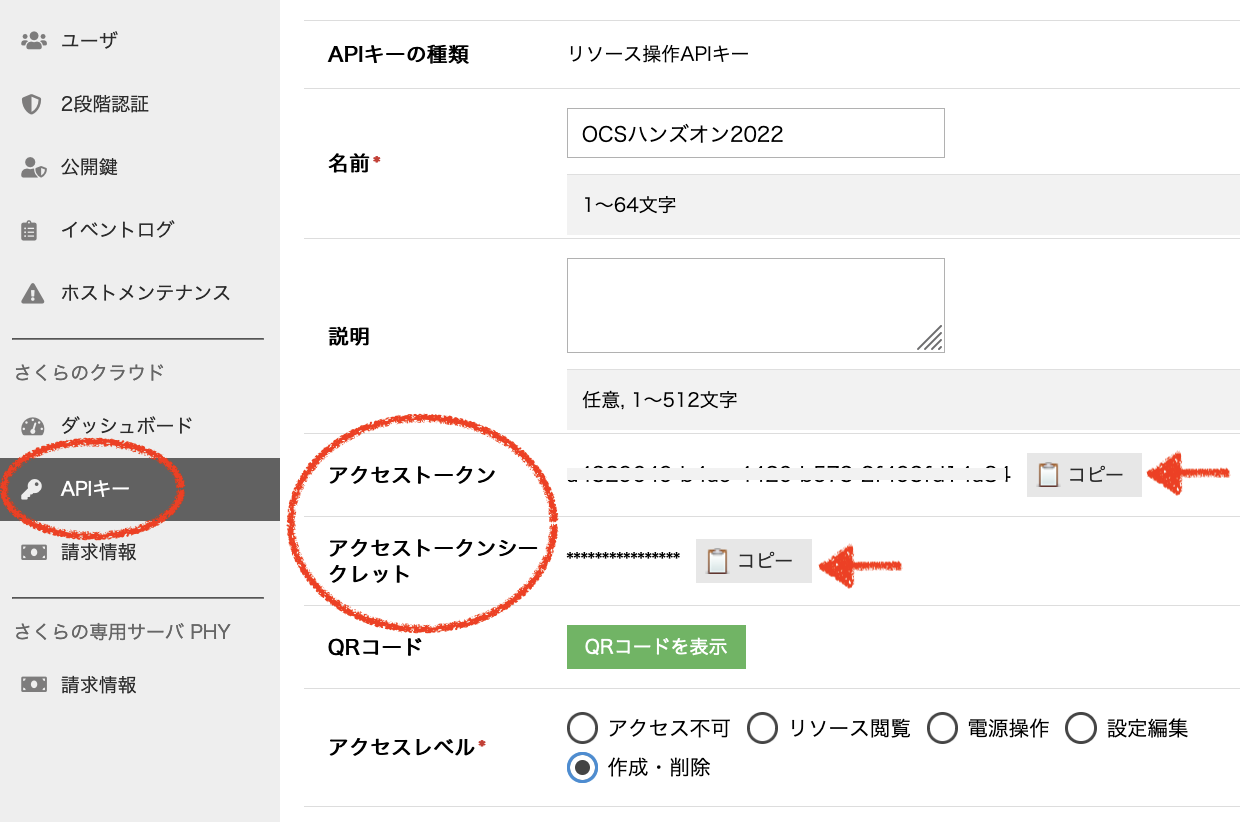

### 秘密情報管理サーバへの書き込み

さくらのクラウドのAPIキーの内容を秘密情報管理サーバのストレージに保存します。

秘密情報管理サーバを利用するには **VCコントローラのアクセストークン** が必要となります。次のセルを実行すると入力枠が表示されるのでトークンの値を入力してください。

> トークン入力後に Enter キーを押すことで入力が完了します。

ハンズオン環境構築時に作成済みのトークンはこちら→ [token.txt](/jupyter/files/token.txt)

In [ ]:
from getpass import getpass
vcc_access_token = getpass()

秘密情報管理サーバへの書き込み準備のために、次のセルを実行してください。

In [ ]:
from common import logsetting
from vcpsdk.vcpsdk import VcpSDK

vcp = VcpSDK(vcc_access_token)
vault_url = vcp.vcc_info()["vault_url"]

def post_credential(key, value):
    ret = !curl -s -X POST -H "X-Vault-Token: {vcc_access_token}" "{vault_url}/v1/cubbyhole/{key}" -d '{{"value":"{value}"}}'
    if len(ret) == 0:
        print("OK")
    else:
        print(ret)
        raise Exception("ERROR")

次のセルを実行し、さくらのクラウドのAPIキー 「**アクセストークン**」を入力してください。

In [ ]:
key = "sakura/token"
value = getpass("さくらのクラウド アクセストークン:")
post_credential(key, value)

次のセルを実行し、さくらのクラウドのAPIキー 「**アクセストークンシークレット**」を入力してください。

In [ ]:
key = "sakura/secret"
value = getpass("さくらのクラウド アクセストークンシークレット:")
post_credential(key, value)

# マニュアル・ドキュメント類の準備
## VCP SDK マニュアル

VCP SDK マニュアル最新版のディレクトリとファイルを Jupyter Notebook 環境に展開します。

In [ ]:
!cp -r $HOME/vcp/vcpsdk/doc .

## アプリケーション・テンプレート

OCS アプリケーション・テンプレートのディレクトリとファイルを Jupyter Notebook 環境に展開します。

In [ ]:
!git clone https://github.com/nii-gakunin-cloud/ocs-templates.git templates

## VCP SDK テストセット

VCP SDK のテストセット、サンプル実装のディレクトリとファイルを Jupyter Notebook 環境に展開します。

In [ ]:
!cp -r $HOME/vcp/vcpsdk/sdk_test $HOME/vcp/vcpsdk/sample .